<center>
    <h1>Tema 2: Aprendizaje Supervisado</h1>
    <br/>
    <h1>Regresión Lineal</h1>
    <br/>
    <h5>Prof. Wladimir Rodríguez</h5>
    <h5>wladimir@ula.ve</h5>
    <h5>Departamento de Computación</h5>
</center>

# Introducción a la Regresión Lineal

En la regresión lineal, estamos interesados en predecir una salida  objetivo de valor escalar, tal como el precio de una acción. Por lineal, queremos decir que la salida objetivo debe ser predicha como una función lineal de las entradas. Este es un tipo de algoritmo de aprendizaje supervisado


In [1]:
# importar
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import seaborn as sns
# Esto permite que los gráficos aparezcan directamente en el notebook
%matplotlib inline

## Ejemplo: Datos de Publicidad

Echemos un vistazo a algunos datos, hacer algunas preguntas sobre esos datos, y luego usar la regresión lineal para responder a esas preguntas!

In [2]:
# Leer los datos a un DataFrame
data = pd.read_csv('../datos/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


¿Cuáles son las **atributos**?

- **TV**: dólares de publicidad gastados en televisión para un solo producto en un mercado dado (en miles de dólares)
- **Radio**: dólares de publicidad en Radio
- **Newspaper**: dólares de publicidad en periódicos

¿Cuál es la **respuesta**?

- **Sales**: ventas de un solo producto en un mercado determinado (en miles de productos)

Información sobre el _dataframe_ data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
# imprimir la forma del DataFrame
data.shape

(200, 4)

Información estadística acerca del conjunto de datos

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Hay 200 observaciones, y por lo tanto 200 mercados en el conjunto de datos.

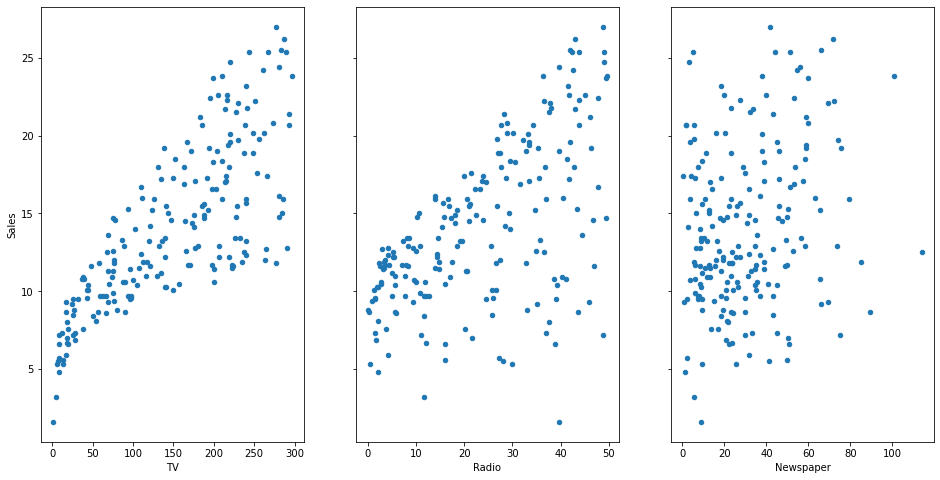

In [6]:
# Visualizar la relación entre los atributos y la respuesta usando diagramas de dispersión
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2]);

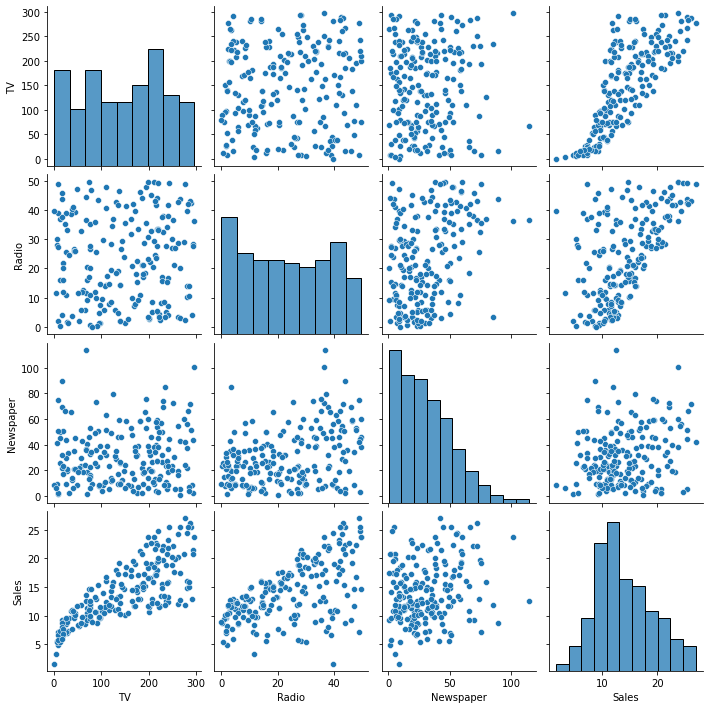

In [7]:
# using seaborn
sns.pairplot(data=data);

## Preguntas sobre los datos de publicidad

Vamos a suponer que usted trabaja para la empresa que fabrica y comercializa este producto. La compañía podría preguntarle lo siguiente: Sobre la base de estos datos, ¿cómo debemos gastar nuestro dinero de publicidad en el futuro?

Esta pregunta general puede conducir a preguntas más específicas:
1. ¿Existe una relación entre los anuncios y las ventas?
2. ¿Qué tan fuerte es esa relación?
3. ¿Qué tipos de anuncios contribuyen a las ventas?
4. ¿Cuál es el efecto de cada tipo de anuncio en las ventas?
5. Dado el gasto en publicidad en un mercado determinado. ¿Podemos predecir las ventas?


Exploraremos estas preguntas a continuación.

## Regresión lineal simple

La regresión lineal simple es una aproximación para predecir una **respuesta cuantitativa** usando un **atributo único** (o "predictor" o "variable de entrada"). Tiene la siguiente forma:


$y = \beta_0 + \beta_1x +\epsilon$

¿Qué representa cada término?
- $y$ es la respuesta
- $x$ es el atributo
- $\beta_0$ es el intercepto con el eje y
- $\beta_1$ es el coeficiente (pendiente) de x
- $\epsilon$ es el error aleatorio

Juntos, $\beta_0$ y $\beta_1$ se llaman los **coeficientes del modelo**. Para crear el modelo, se deben "aprender" los valores de estos coeficientes. Y una vez que se han aprendido estos coeficientes, podemos usar el modelo para predecir las ventas!

## Estimar ("Aprender") Coeficientes de modelo

En general, los coeficientes se calculan utilizando el **criterio de los mínimos cuadrados**, lo que significa que encontramos (matemáticamente) la línea  que minimiza la suma **de los cuadrados de los residuos** (o "suma de los errores al cuadrado"):

<center>
    <br/>
    <img src='../figuras/EstimarCoeficientes.png'/ width=400 height=300>
</center>

¿Qué elementos están presentes en la figura?
- Los puntos azules son los **valores observados** de x e y.
- La línea negra es nuestra **línea de mínimos cuadrados**.
- Las líneas rojas son los **residuos**, que son las distancias entre los valores observados y la línea de mínimos cuadrados.

¿Cómo se relacionan los coeficientes del modelo con la línea de mínimos cuadrados?
- $\beta_0$ es el **intercepto** (el valor de $y$ cuando $x$ = 0)
- $\beta_1$ es la **pendiente** (el cambio en $y$ dividido por cambio en $x$)

Aquí está una representación gráfica de esos cálculos:
<center>
    <br/>
    <img src='../figuras/pendiente_intercepto.png' width=400 height=300/>
</center>

## Formulas para el calculo de los mínimos cuadrados

Pendiente: $$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2}$$

Intercepto: $$\beta_0 = \bar y - \beta_1 \bar x$$

Donde $\bar y$ y $\bar x$ son las medias de las observaciones: $$\bar y = \frac{1}{n}\sum_{i=1}^{n}y_i$$

$$\bar x = \frac{1}{n}\sum_{i=1}^{n}x_i$$


## Regresión Lineal en scikit-learn

In [45]:
# crear X and y
X = data.TV.to_frame()
y = data.Sales

In [46]:
# seguir el patron de uso de sklearn: importar, instanciar, ajustar
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# imprimir intercepto y coeficientes
print (lm.intercept_)
print (lm.coef_)

7.032593549127693
[0.04753664]


## Interpretación de los coeficientes del modelo

¿Cómo interpretamos el coeficiente de TV ($\beta_1$)?
- Un aumento de una "unidad" en el gasto publicitario de televisión **se asocia con** un aumento de 0,047537 unidades en ventas.
- O más claramente: $1.000 adicionales gastados en anuncios de televisión **se asocian con** un aumento en las ventas de 47,537 productos.

Tenga en cuenta que si un aumento en el gasto publicitario de televisión se asocia con una **disminución** en las ventas, $\beta_1$ sería **negativo**.

## Uso del modelo para la predicción

Digamos que hubo un nuevo mercado donde la inversión publicitaria en televisión fue **$50.000**. ¿Qué predeciríamos para las ventas en ese mercado?

$$y = \beta_0 + \beta_1x$$
$$y = 7,032594 + 0,047537 \times 50$$

In [47]:
# calcular manualmente la predicción
7.032594 + 0.047537*50

9.409444

Por lo tanto, predeciríamos ventas de **9.409 productos** en ese mercado.

Por supuesto, también podemos usar el modelo generado para hacer la predicción:

In [48]:
# tenemos que crear un DataFrame ya que scikit-learn lo usa
X_nuevo = pd.DataFrame({'TV': [50]})
X_nuevo.head()

,TV
0,50


In [49]:
# hacer las predicciones y almacenarlas
preds = lm.predict(X_nuevo)
preds

array([9.40942557])

## Graficar los coeficientes $\beta_0$ y $\beta_1$

A continuación se mostrarán una gráfica de contorno y una de superficie de los coeficientes de regresión $\beta_0$ y $\beta_1$

In [50]:
# Crear coordenadas de la cuadrícula para graficar
B0 = np.linspace(lm.intercept_ - 4, lm.intercept_ + 4, 50)
B1 = np.linspace(lm.coef_[0] - 0.03, lm.coef_[0] + 0.03, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))
X1 = X.values.reshape(-1,1)   # Convertir dataframe X a un arreglo numpy

# Calcular los valores de Z (RSS) basedo en la cuadricula de coeficientes
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X1.ravel()*yy[i,j]))**2).sum()/1000

# RSS mínimo
min_RSS = r'$\beta_0$, $\beta_1$ para el RSS mínimo'
min_rss = np.sum((lm.intercept_ + lm.coef_ * X - y.values.reshape(-1,1))**2)/1000
min_rss

TV    2.102531
dtype: float64

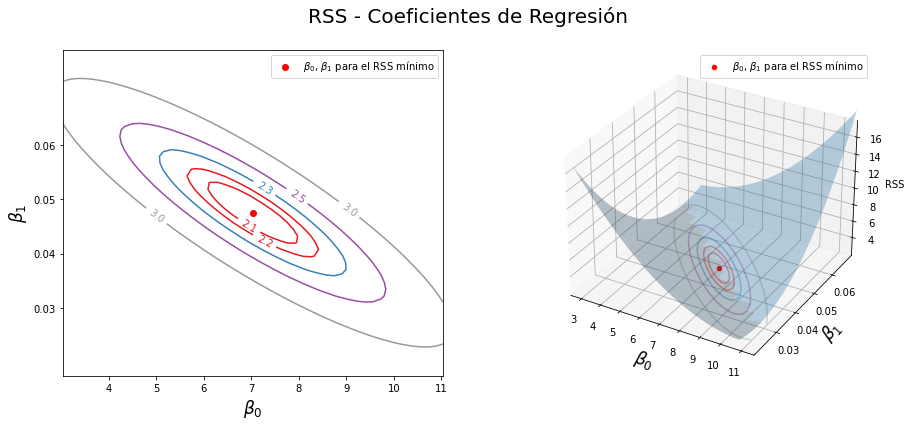

In [51]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Coeficientes de Regresión', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Gráfico izquierdo
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(lm.intercept_, lm.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Gráfico derecho
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(lm.intercept_, lm.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# ajustes comunes de los dos gráficos
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

## Graficar la línea de mínimos cuadrados

Hagamos predicciones para los **valores más pequeños y más grandes observados de x**, y luego usamos los valores predichos para trazar la línea de mínimos cuadrados:

In [15]:
# crear un DataFrame con los valores mínimo y máximo de TV
X_nuevo = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_nuevo.head()

,TV
0,0.7
1,296.4


In [16]:
# hacer las predicciones para esos valores de x y almacenarlos
preds = lm.predict(X_nuevo)
preds

array([ 7.0658692 , 21.12245377])

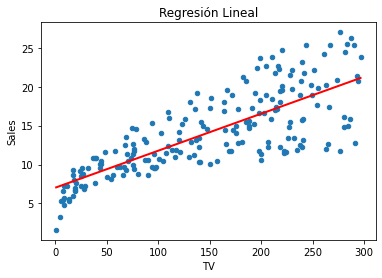

In [17]:
# primero, graficamos los datos observados
data.plot(kind='scatter', x='TV', y='Sales')
plt.title('Regresión Lineal')
# después, graficamos la línea de mínimos cuadrados
plt.plot(X_nuevo, preds, c='red', linewidth=2);

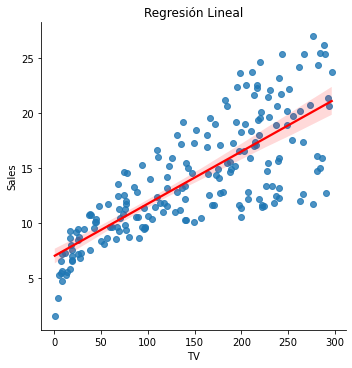

In [54]:
# using seaborn

sns.lmplot(data=data, x="TV", y="Sales", line_kws={'color': 'red'}).set(title='Regresión Lineal');

## ¿Qué tan bien ajusta el modelo a los datos?

La forma más común de evaluar el ajuste general de un modelo lineal es por el valor **R-cuadrado**. R-cuadrado es la **proporción de la varianza explicada**, que significa la proporción de varianza en los datos observados que se explica por el modelo, o la reducción del error sobre el **modelo nulo**. (El modelo nulo sólo predice la media de la respuesta observada, y por lo tanto tiene una intersección y sin pendiente.)

$$R^2 = 1 - \frac{(Suma\ de\ los\ cuadrados\ de\ la\ linea\ de\ mínimos\ cuadrados)}{(Suma\ de\ los\ cuadrados\ de\ la\ línea\ media)}$$

R-cuadrado está entre 0 y 1, y más alto es mejor porque significa que más variación es explicada por el modelo. He aquí un ejemplo de lo que R-cuadrado:

<center>
    <img src='../figuras/r_cuadrado.png'/>
</center>

Se puede ver que la **línea azul** explica algo de la varianza en los datos (R-cuadrado = 0.54), la **línea verde** explica más de la varianza (R-cuadrado = 0.64), y el **La línea roja** ajusta los datos del entrenamiento aún más (R-cuadrado = 0,66). (¿Parece que la línea roja está sobreajustada?)

Calculemos el valor R-cuadrado para nuestro modelo lineal simple:

In [55]:
lm.score(X, y)

0.611875050850071

¿Es eso un "buen" valor R-cuadrado? Es difícil de decir. El umbral para un buen valor R-cuadrado depende del dominio. Por lo tanto, es más útil como una herramienta para **comparar diferentes modelos**.

## Regresión lineal múltiple

La regresión lineal simple se puede extender fácilmente para incluir múltiples atributos. Esto se llama **regresión lineal múltiple**:

$Y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

### Regresión lineal múltiple con todos los atributos

Cada $x$ representa un atributo diferente, y cada atributo tiene su propio coeficiente. En este caso:

$$Y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$$

Utilicemos scikit-learn para estimar estos coeficientes:

In [57]:
# crear X y y
atributos_cols = ['TV', 'Radio', 'Newspaper']
X = data[atributos_cols]
y = data.Sales

# Ajustar el modelo
lm.fit(X, y)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
w = [lm.intercept_]
w =+ lm.coef_
w

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


array([ 0.04576465,  0.18853002, -0.00103749])

In [58]:
# aparear los nombres de los atributos con los coeficientes
list(zip(atributos_cols, lm.coef_))

[('TV', 0.045764645455397615),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763007)]

In [59]:
# predicción para una nueva observación
x1 = pd.DataFrame({'TV': [100], 'Radio': [25], 'Newspaper': [25]})
lm.predict(x1)

array([12.20266701])

In [60]:
# calcular el R-cuadrado
lm.score(X, y)

0.8972106381789522

### Regresion líneal múltiple usando 2 atributos

In [62]:
# crear X y y
atributos_cols = ['Radio', 'TV']
X = data[atributos_cols].values
y = data.Sales

# Ajustar el modelo
lm.fit(X, y)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
w = [lm.intercept_]
w =+ lm.coef_
w

2.9210999124051398
[0.18799423 0.04575482]


array([0.18799423, 0.04575482])

In [63]:
# aparear los nombres de los atributos con los coeficientes
list(zip(atributos_cols, lm.coef_))

[('Radio', 0.18799422662030915), ('TV', 0.045754815101076145)]

In [64]:
# predicción para una nueva observación
x1 = pd.DataFrame({'TV': [100], 'Radio': [25]})
lm.predict(x1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([22.86439295])

In [65]:
# calcular el R-cuadrado
lm.score(X, y)

0.8971942610828956

### Graficar plano 

In [67]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(lm.intercept_ + B1[i,j]*lm.coef_[0] + B2[i,j]*lm.coef_[1])

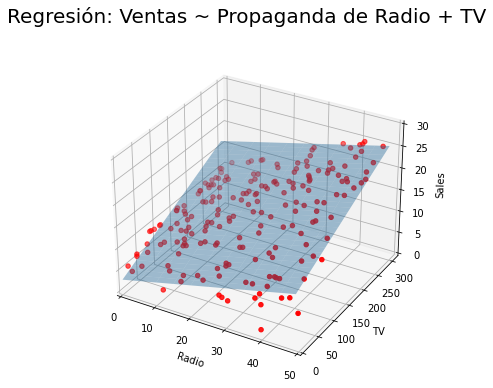

In [70]:
# Create plot as inteactive window

#%matplotlib qt
%matplotlib inline
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regresión: Ventas ~ Propaganda de Radio + TV', fontsize=20)
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter(data.Radio, data.TV, data.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');
ax.set_zlim(0,30);

### Referencias

- Capítulo 3 del libro: [An Introduction to Statistical Learning](http://www.springer.com/gp/book/9781461471370); Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani. Spriger 2013.


- [mplot3d](https://matplotlib.org/1.5.3/mpl_toolkits/mplot3d/index.html): El kit de herramientas mplot3d agrega capacidades simples de trazado en 3D a matplotlib suministrando un objeto de ejes que puede crear una proyección 2D de una escena 3D. El gráfico resultante tendrá el mismo aspecto que los gráficos 2D normales.